# $\ell_1$ trend filtering

A derivative work by Judson Wilson, 5/28/2014.<br>
Adapted from the CVX example of the same name, by Kwangmoo Koh, 12/10/2007

Topic Reference:

* S.-J. Kim, K. Koh, S. Boyd, and D. Gorinevsky, ``l_1 Trend Filtering''<br>
http://stanford.edu/~boyd/papers/l1_trend_filter.html

## Introduction

The problem of estimating underlying trends in time series data arises in a variety of disciplines. The $\ell_1$ trend filtering method produces trend estimates $x$ that are piecewise linear from the time series $y$.

The $\ell_1$ trend estimation problem can be formulated as
    \begin{array}{ll}
    \mbox{minimize}   &  (1/2)||y-x||_2^2 + \lambda ||Dx||_1,
    \end{array}
with variable $x$ , and problem data $y$ and $\lambda$, with $\lambda >0$.
$D$ is the second difference matrix, with rows 
    $$\begin{bmatrix}0 & \cdots & 0 & -1 & 2 & -1 & 0 & \cdots & 0 \end{bmatrix}.$$
CVXPY is not optimized for the $\ell_1$ trend filtering problem.
For large problems, use l1_tf (http://www.stanford.edu/~boyd/l1_tf/).

## Formulate and solve problem

In [1]:
import numpy as np
import cvxpy as cp
import scipy as scipy
import cvxopt as cvxopt

# Load time series data: S&P 500 price log.
y = np.loadtxt(open('data/snp500.txt', 'rb'), delimiter=",", skiprows=1)
n = y.size

# Form second difference matrix.
e = np.ones((1, n))
D = scipy.sparse.diags_array([e, -2*e, e], offsets=range(3), shape=(n-2, n))

# Set regularization parameter.
vlambda = 50

# Solve l1 trend filtering problem.
x = cp.Variable(shape=n)
obj = cp.Minimize(0.5 * cp.sum_squares(y - x)
                  + vlambda * cp.norm(D*x, 1) )
prob = cp.Problem(obj)

# ECOS and SCS solvers fail to converge before
# the iteration limit. Use CVXOPT instead.
prob.solve(solver=cp.CVXOPT, verbose=True)
print('Solver status: {}'.format(prob.status))

# Check for error.
if prob.status != cp.OPTIMAL:
    raise Exception("Solver did not converge!")

print("optimal objective value: {}".format(obj.value))

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.0000e+00  1e+05  1e-01  4e-02  1e+00
 1:  2.2350e-01  1.5374e-01  8e+03  8e-03  3e-03  7e-02
 2:  1.9086e-01  2.3346e-01  1e+03  1e-03  4e-04  6e-02
 3:  3.9403e-01  4.4110e-01  7e+02  7e-04  3e-04  6e-02
 4:  3.5979e-01  4.1278e-01  3e+02  3e-04  1e-04  6e-02
 5:  6.4154e-01  6.4522e-01  2e+01  2e-05  7e-06  4e-03
 6:  9.0480e-01  9.0710e-01  1e+01  1e-05  4e-06  3e-03
 7:  9.9603e-01  9.9825e-01  1e+01  1e-05  4e-06  2e-03
 8:  1.0529e+00  1.0542e+00  6e+00  6e-06  2e-06  1e-03
 9:  1.1994e+00  1.2004e+00  4e+00  4e-06  2e-06  1e-03
10:  1.2689e+00  1.2693e+00  2e+00  2e-06  6e-07  4e-04
11:  1.3728e+00  1.3729e+00  5e-01  5e-07  2e-07  1e-04
12:  1.3802e+00  1.3803e+00  2e-01  2e-07  9e-08  6e-05
13:  1.3965e+00  1.3965e+00  1e-01  1e-07  4e-08  3e-05
14:  1.3998e+00  1.3998e+00  3e-02  3e-08  1e-08  8e-06
15:  1.3999e+00  1.3999e+00  3e-02  3e-08  1e-08  7e-06
16:  1.4011e+00  1.4011e+00  9e-03  9e-09  3e-09  

## Results plot

Text(0, 0.5, 'log price')

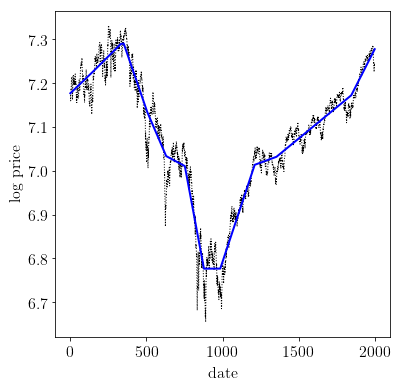

In [2]:
import matplotlib.pyplot as plt

# Show plots inline in ipython.
%matplotlib inline

# Plot properties.
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font = {'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Plot estimated trend with original signal.
plt.figure(figsize=(6, 6))
plt.plot(np.arange(1,n+1), y, 'k:', linewidth=1.0)
plt.plot(np.arange(1,n+1), np.array(x.value), 'b-', linewidth=2.0)
plt.xlabel('date')
plt.ylabel('log price')